In [ ]:
import torch
from pathlib import Path


In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)
device

'cuda'

In [3]:
from modular.data_setup import  setup_fsl_train_test_dataloaders
data_path = Path("data/")

train_loader, test_loader, fsl_dataset,(train_n_way, test_n_way) = setup_fsl_train_test_dataloaders(data_path,train_episodes=400,test_episodes=300,n_way=5,k_shot=3,q_query=9)

len(fsl_dataset), len(fsl_dataset.classes), fsl_dataset.class_to_idx, fsl_dataset[0][0].shape, fsl_dataset[0][1] , train_n_way,test_n_way

Dataset class distribution: {0: 38, 1: 31, 2: 42, 3: 31, 4: 38, 5: 34, 6: 37, 7: 35, 8: 28, 9: 25, 10: 30}
Found 11 valid classes with at least 12 samples each
Automatically split classes:
  Training classes (6): Rotor-0, A&C&B10, A&B50, A&C30, Noload, A30
  Testing classes (5): A10, Fan, A&C&B30, A&C10, A50
Training class distribution: {0: 38, 1: 31, 4: 38, 6: 37, 9: 25, 10: 30}
Testing class distribution: {2: 42, 3: 31, 5: 34, 7: 35, 8: 28}
Using n_way=5 for training, n_way=5 for testing
Valid classes for sampling: 6
Classes with counts: [(0, 38), (1, 31), (4, 38), (6, 37), (9, 25), (10, 30)]
Valid classes for sampling: 5
Classes with counts: [(2, 42), (3, 31), (5, 34), (7, 35), (8, 28)]


(369,
 11,
 {'A&B50': 0,
  'A&C&B10': 1,
  'A&C&B30': 2,
  'A&C10': 3,
  'A&C30': 4,
  'A10': 5,
  'A30': 6,
  'A50': 7,
  'Fan': 8,
  'Noload': 9,
  'Rotor-0': 10},
 torch.Size([3, 128, 128]),
 0,
 5,
 5)

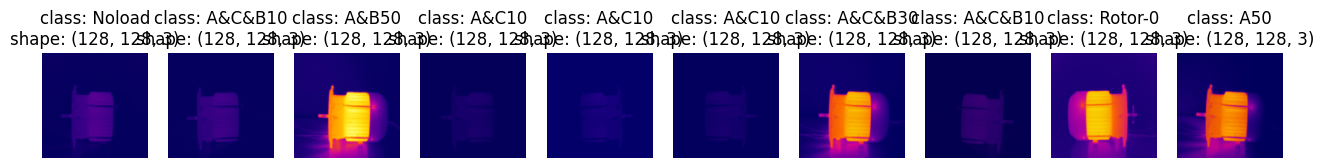

In [4]:
from modular.utils import display_random_images
display_random_images(fsl_dataset, classes=fsl_dataset.classes, n=10, display_shape=True, seed=42)

In [ ]:
from modular import model_builder
model = model_builder.Resnet18(embedding_dim=256)

In [6]:
from torchinfo import summary
# Print a summary using torchinfo (uncomment for actual output)
summary(model=model, 
        input_size=(32, 3, 128, 128), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
Resnet18 (Resnet18)                           [32, 3, 128, 128]    [32, 128]            --                   Partial
├─Sequential (encoder)                        [32, 3, 128, 128]    [32, 512, 1, 1]      --                   Partial
│    └─Conv2d (0)                             [32, 3, 128, 128]    [32, 64, 64, 64]     (9,408)              False
│    └─BatchNorm2d (1)                        [32, 64, 64, 64]     [32, 64, 64, 64]     (128)                False
│    └─ReLU (2)                               [32, 64, 64, 64]     [32, 64, 64, 64]     --                   --
│    └─MaxPool2d (3)                          [32, 64, 64, 64]     [32, 64, 32, 32]     --                   --
│    └─Sequential (4)                         [32, 64, 32, 32]     [32, 64, 32, 32]     --                   False
│    │    └─BasicBlock (0)                    [32, 64, 32, 32]     [32, 64, 32

In [7]:
# Validate dataset and dataloaders
for batch in train_loader:
    support_images, support_labels, query_images, query_labels = batch
    print(f"Support set: {support_images.shape}, {support_labels.shape}")
    print(f"Query set: {query_images.shape}, {query_labels.shape}")
    break



Support set: torch.Size([15, 3, 128, 128]), torch.Size([15])
Query set: torch.Size([45, 3, 128, 128]), torch.Size([45])


In [8]:
from collections import Counter

class_counts = Counter(fsl_dataset.labels)
print("Class distribution:", class_counts)

Class distribution: Counter({2: 42, 0: 38, 4: 38, 6: 37, 7: 35, 5: 34, 1: 31, 3: 31, 10: 30, 8: 28, 9: 25})


In [9]:
from collections import Counter

train_class_counts = Counter([fsl_dataset.labels[i] for i in train_loader.batch_sampler.labels])
print("Training class distribution:", train_class_counts)

Training class distribution: Counter({0: 199})
